In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline 
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
#Reading the csv file.
dt = pd.read_csv("food.csv")
#Preview the Top 5 rows in the Dataset.
dt.head(3)

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe


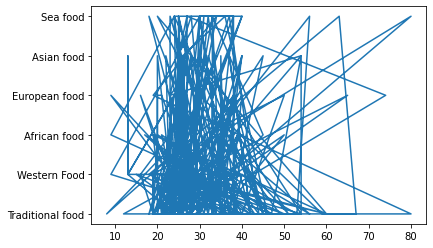

In [5]:
plt.plot(dt["Age"], dt["Food"])

In [6]:
#Find out the rows and columns in the Data set.  
dt.shape

(288, 8)

In [48]:
!pip freeze > requirements.txt

In [7]:
#Finding out which features have the missing values.
dt.isnull().sum()

Timestamp         0
Participant_ID    0
Gender            4
Nationality       0
Age               0
Food              0
Juice             0
Dessert           0
dtype: int64

In [8]:
dt.isnull().sum().sum()

4

In [9]:
dt.Food.head(4)

0    Traditional food
1        Western Food
2        Western Food
3    Traditional food
Name: Food, dtype: object

In [10]:
#Checking for unique values in the Food column
dt.Food.unique()

array(['Traditional food', 'Western Food', 'African food',
       'European food', 'Asian food', 'Sea food'], dtype=object)

In [11]:
dt.Nationality.unique()

array(['Indian', 'Pakistani ', 'Tanzanian', 'Indonesia', 'Muslim',
       'Pakistan', 'Maldivian ', 'MY', 'Malaysian', 'Malaysian ',
       'Indonesian ', 'Maldivian', 'MALAYSIAN', 'Malaysia ', 'Pakistani',
       'Canadian', 'Nigerian ', 'Algerian ', 'Korean ', 'Seychellois',
       'Indonesain', 'Indonesian', 'Malaysia', 'Japan', 'China',
       'Mauritian', 'Yemen'], dtype=object)

In [12]:
dt.Age.unique()

array([24, 22, 31, 25, 27, 34, 19, 16, 23, 26, 38, 21, 20, 43, 29, 39, 40,
       13, 18, 60, 30, 47, 54, 74, 80, 33, 36, 28, 32,  8, 12, 56, 53, 59,
       67, 63, 37, 15, 35,  9, 65, 45, 50, 49, 42, 51, 44, 17, 46],
      dtype=int64)

In [13]:
dt.Dessert.unique()

array(['Maybe', 'Yes', 'No'], dtype=object)

In [14]:
dt.Juice.unique()

array(['Fresh Juice', 'Carbonated drinks'], dtype=object)

In [15]:
dt

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,African food,Fresh Juice,Maybe
...,...,...,...,...,...,...,...,...
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Sea food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Sea food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes


In [16]:
#Divinding my dataset into train and test
x = dt.loc[:,["Gender", "Nationality", "Age", "Juice", "Dessert"]]
x.head(2)

,Gender,Nationality,Age,Juice,Dessert
0,Male,Indian,24,Fresh Juice,Maybe
1,Female,Indian,22,Carbonated drinks,Yes


In [17]:
y = dt.loc[:,["Food"]]
y.head(3)

,Food
0,Traditional food
1,Western Food
2,Western Food


In [18]:
#Storing the features in the a variable
#x.columns
xcols = [col for col in x.columns]
xcols

['Gender', 'Nationality', 'Age', 'Juice', 'Dessert']

In [19]:
#making a pipeline
pq = make_pipeline(SimpleImputer(strategy = "constant", add_indicator = False, fill_value = "female"), OneHotEncoder(sparse = False, handle_unknown = "ignore"))

In [20]:
#making a column transformer
Ct = make_column_transformer((pq, xcols), remainder = "passthrough")

In [21]:
#Encoding my labels
Le = LabelEncoder()
y = Le.fit_transform(dt["Food"])

In [22]:
y

array([4, 5, 5, 4, 0, 0, 4, 5, 4, 5, 0, 4, 4, 5, 4, 0, 2, 4, 2, 4, 2, 2,
       5, 5, 4, 2, 4, 5, 4, 1, 4, 5, 5, 1, 5, 2, 5, 4, 4, 1, 4, 2, 5, 4,
       5, 4, 5, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 5, 1, 2, 3, 2,
       4, 4, 5, 3, 4, 3, 2, 4, 4, 2, 3, 4, 4, 0, 4, 0, 4, 0, 4, 1, 0, 2,
       4, 0, 4, 3, 5, 4, 4, 5, 5, 4, 3, 5, 3, 3, 4, 5, 4, 1, 4, 4, 5, 2,
       5, 4, 1, 4, 1, 2, 4, 0, 4, 0, 4, 4, 5, 4, 3, 4, 0, 4, 0, 4, 3, 0,
       3, 4, 1, 4, 5, 2, 4, 4, 3, 5, 4, 4, 2, 5, 4, 4, 1, 4, 5, 4, 1, 4,
       5, 4, 4, 2, 4, 4, 5, 2, 4, 3, 4, 2, 4, 4, 2, 3, 4, 2, 5, 4, 1, 4,
       3, 5, 4, 4, 1, 4, 2, 4, 5, 4, 4, 0, 3, 4, 0, 4, 4, 2, 0, 4, 4, 0,
       4, 4, 4, 0, 4, 0, 4, 2, 4, 2, 4, 3, 0, 4, 1, 4, 4, 5, 5, 3, 4, 0,
       3, 3, 4, 0, 3, 3, 4, 0, 4, 5, 4, 4, 5, 5, 4, 3, 4, 0, 4, 3, 0, 4,
       5, 4, 4, 1, 4, 1, 4, 3, 1, 0, 4, 4, 0, 4, 4, 1, 4, 0, 4, 3, 1, 4,
       4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 5, 3, 4, 1, 1, 3, 4, 3, 4, 5, 3, 3,
       4, 4])

In [23]:
pd.DataFrame(y).head(3)

,0
0,4
1,5
2,5


In [24]:
y.shape


(288,)

In [25]:
x.shape

(288, 5)

In [26]:
#Model perfomance
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1278)

In [27]:
x_train.shape

(230, 5)

In [28]:
x_test.shape

(58, 5)

In [29]:
TransXT = Ct.fit_transform(x_train)
TransXT

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [30]:
pd.DataFrame(TransXT).head(3)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [31]:
x_train.shape

(230, 5)

In [32]:
y_train.shape

(230,)

In [33]:
#model selection
model = DecisionTreeRegressor()

In [34]:
#make a pipeline
pipe = make_pipeline(Ct, model)

In [35]:
#Train model 
pipe1 = pipe.fit(x, y)

In [36]:
pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='female',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Gender', 'Nationality',
                                                   'Age', 'Juice',
                                                   'Dessert'])])),
                ('decisiontreeregressor', DecisionT

In [37]:
x_test.shape

(58, 5)

In [38]:
y_test.shape

(58,)

In [39]:
#Measuring model performance using r2 score.
from sklearn.metrics import r2_score
y_pred = pipe1.predict(x_test)
r2_score(y_test, y_pred)

0.4802970148108039

In [40]:
#saving the model
import joblib
joblib.dump(pipe1, "modell")

['modell']

In [41]:
#get a sample from the dataset.
samp = x.sample(1, random_state = 130)

In [42]:
samp

,Gender,Nationality,Age,Juice,Dessert
13,Female,Indian,24,Carbonated drinks,Yes


In [43]:
#pipeline predict function
# function prediction, matching the value predicted by model to the value of the tranformed labels.
def prediction(A):
    if A>=4 and A<=4.9:
        print("Traditional Food")
    elif A>=5 and A<=5.9:
        print("Western Food")
    elif A<=0 and A<=0.9:
        print("African Food")
    elif A>=3 and A<=3.9:
        print("Asian Food")
    elif A>=2 and A<=2.9:
        print("European Food")
    else:
        print("Sea Food")
    
prediction(pipe1.predict(samp))

Western Food


In [44]:
#creating out of sample data
damp = {"Gender":'Male', "Nationality":'Malaysian', "Age":'35', "Juice":"Fresh Juice","Dessert": "No" }

In [45]:
#convert to pandas DT
test = pd.DataFrame(damp, index = [289])

test

,Gender,Nationality,Age,Juice,Dessert
289,Male,Malaysian,35,Fresh Juice,No


In [46]:
#load our model
Model = joblib.load("modell")

In [47]:
#make prediction
Model.predict(test)

array([4.])